In [2]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
from numpy import *
import sys
import matplotlib.pyplot as plt
%matplotlib inline  
from pylab import plot,show,hist,figure,title
import seaborn as sns

In [39]:
## Load datasets (download these files from dropbox into your local mention)
data_path = '/Users/preciousmongwe/Documents/Session_3_data/'  ### change this path to location of the files in your local mention.
cesm_o2_200m_ds = xr.open_dataset(data_path+'cesm_o2_1850_2005_hist_200m_yr_ds.nc')
cesm_temp_200m_ds = xr.open_dataset(data_path+'cesm_temp_1850_2005_hist_200m_yr_ds.nc')

cesm_o2_50m_ds = xr.open_dataset(data_path+'cesm_o2_1850_2005_hist_50m_yr_ds.nc')
cesm_temp_50m_ds = xr.open_dataset(data_path+'cesm_temp_1850_2005_hist_50m_yr_ds.nc')

area_ds = xr.open_dataset(data_path+'cesm_area_cm2_ds.nc').TAREA
area_ds

<xarray.DataArray 'TAREA' (nlat: 384, nlon: 320)>
[122880 values with dtype=float64]
Coordinates:
    TLAT     (nlat, nlon) float64 ...
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    units:      centimeter^2
    long_name:  area of T cells

In [25]:
print(cesm_o2_200m_ds)
print(cesm_temp_200m_ds)

<xarray.Dataset>
Dimensions:    (nlat: 384, nlon: 320, year: 157)
Coordinates:
    TLAT       (nlat, nlon) float64 ...
    TLONG      (nlat, nlon) float64 ...
    z_t        float32 ...
    member_id  int64 ...
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2003 2004 2005 2006
Dimensions without coordinates: nlat, nlon
Data variables:
    O2         (year, nlat, nlon) float32 ...
<xarray.Dataset>
Dimensions:    (nlat: 384, nlon: 320, year: 157)
Coordinates:
    TLAT       (nlat, nlon) float64 ...
    TLONG      (nlat, nlon) float64 ...
    z_t        float32 ...
    member_id  int64 ...
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2003 2004 2005 2006
Dimensions without coordinates: nlat, nlon
Data variables:
    TEMP       (year, nlat, nlon) float32 ...


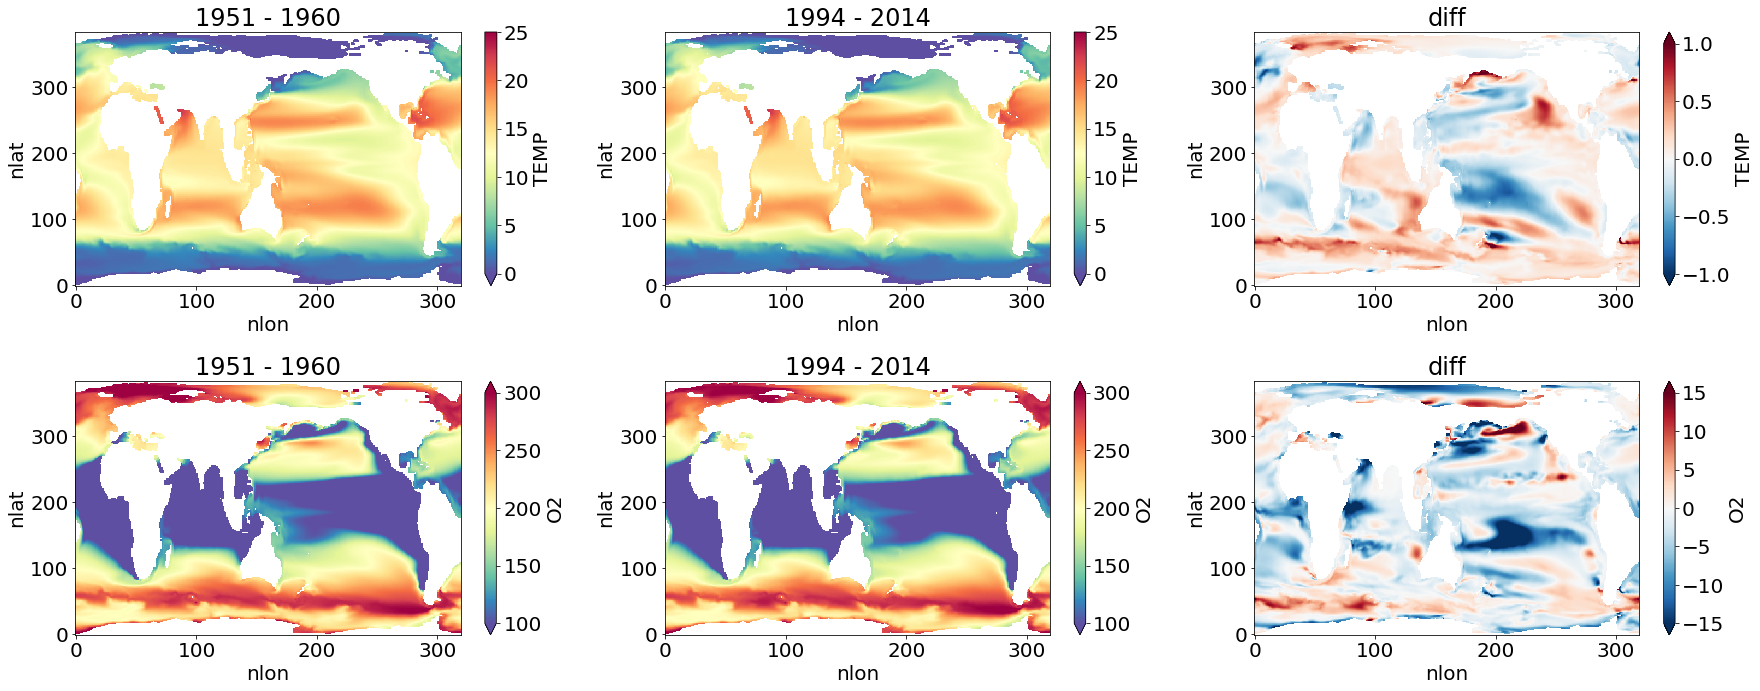

In [26]:
### compute long-term mean changes 
plt.rcParams['font.size'] = 20
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(2,3,1)
cesm_temp_200m_ds.TEMP.sel(year =slice(1951,1960)).mean('year').plot(vmin = 0,vmax = 25,cmap = 'Spectral_r')
plt.title('1951 - 1960')
plt.subplot(2,3,2)
cesm_temp_200m_ds.TEMP.sel(year =slice(1994,2014)).mean('year').plot(vmin = 0,vmax = 25,cmap = 'Spectral_r')
plt.title('1994 - 2014')
plt.subplot(2,3,3)
(cesm_temp_200m_ds.TEMP.sel(year =slice(1994,2014)).mean('year') \
 - cesm_temp_200m_ds.TEMP.sel(year =slice(1951,1960)).mean('year')).plot(vmin = -1.0,vmax = 1.0,cmap = 'RdBu_r')
plt.title('diff')

plt.subplot(2,3,4)
cesm_o2_200m_ds.O2.sel(year =slice(1951,1960)).mean('year').plot(vmin = 100,vmax = 300,cmap = 'Spectral_r')
plt.title('1951 - 1960')
plt.subplot(2,3,5)
cesm_o2_200m_ds.O2.sel(year =slice(1994,2014)).mean('year').plot(vmin = 100,vmax = 300,cmap = 'Spectral_r')
plt.title('1994 - 2014')
plt.subplot(2,3,6)
(cesm_o2_200m_ds.O2.sel(year =slice(1994,2014)).mean('year') \
 - cesm_o2_200m_ds.O2.sel(year =slice(1951,1960)).mean('year')).plot(vmin = -15.0,vmax = 15.0,cmap = 'RdBu_r')
plt.title('diff')
plt.tight_layout()

In [40]:
%%time
## calculate long-term time series anomalies 

def F_time_series_anomalies(var,area):
    """computes time series anamolies"""
    
    ## calculate the anomaly by removing the mean 
    var_anomaly = var - var.mean('year')
    
    ## compute total area sum
    area_sum_ds = area.sum(dim = ['nlon','nlat'])
    
    ## calculate the weighted mean
    var_anomaly_ds = ((var_anomaly*area).sum(dim = ['nlon','nlat']))/area_sum_ds
    
    return var_anomaly_ds.values
    
    
temp_200m_amom_ds = F_time_series_anomalies(cesm_temp_200m_ds.TEMP,area_ds)
temp_50m_amom_ds = F_time_series_anomalies(cesm_temp_50m_ds.TEMP,area_ds)

o2_200m_amom_ds = F_time_series_anomalies(cesm_o2_200m_ds.O2,area_ds)
o2_50m_amom_ds = F_time_series_anomalies(cesm_o2_50m_ds.O2,area_ds)

CPU times: user 398 ms, sys: 327 ms, total: 726 ms
Wall time: 759 ms


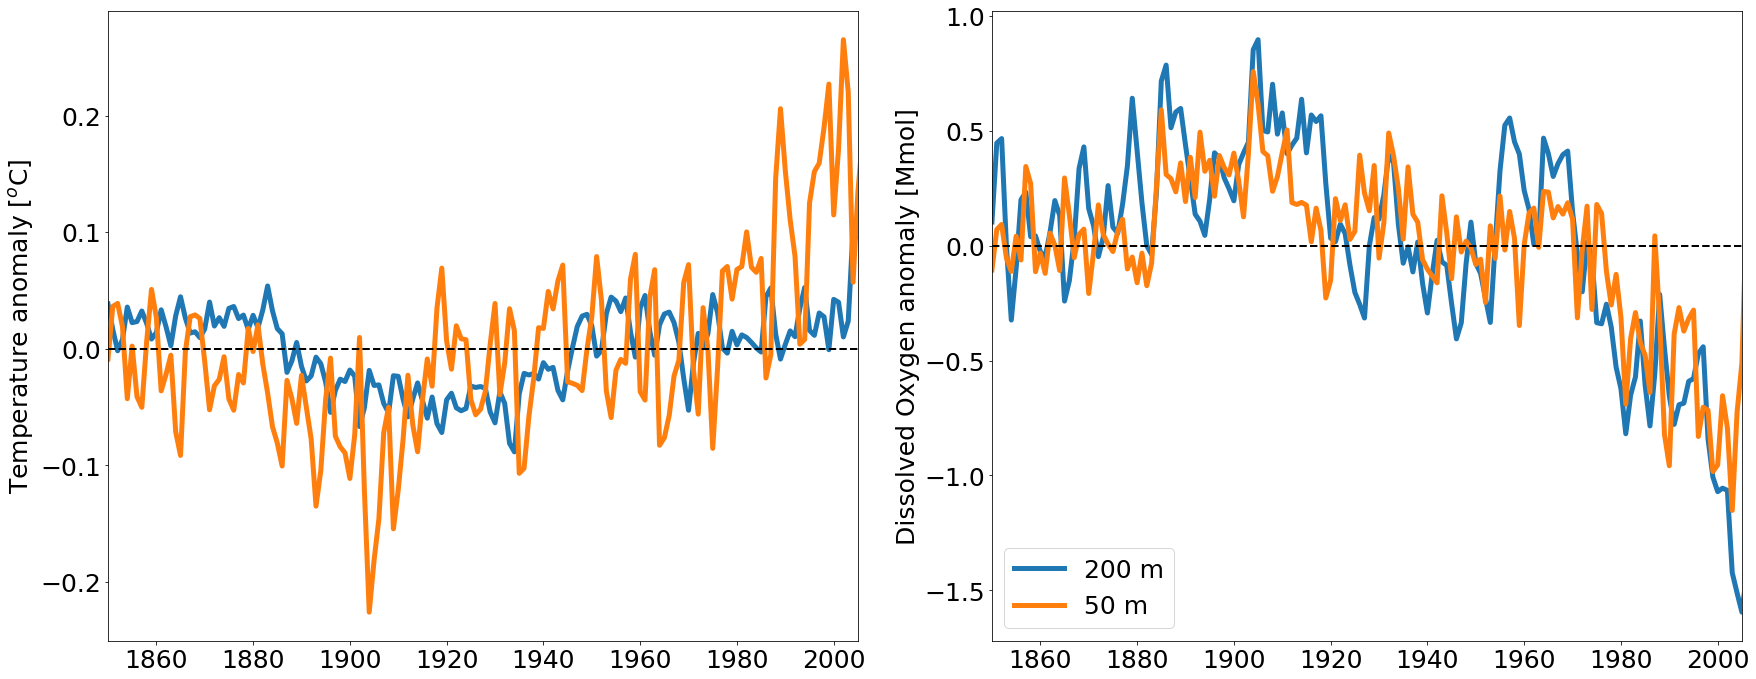

In [41]:
## plot time series
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(121)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_200m_amom_ds)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_50m_amom_ds)
plt.plot(cesm_temp_200m_ds.TEMP.year,np.zeros(len(cesm_temp_200m_ds.TEMP.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.ylabel('Temperature anomaly [$^o$C]')

plt.subplot(122)
plt.plot(cesm_o2_200m_ds.O2.year,o2_200m_amom_ds,label = '200 m')
plt.plot(cesm_o2_50m_ds.O2.year,o2_50m_amom_ds,label = '50 m')
plt.plot(cesm_o2_200m_ds.O2.year,np.zeros(len(cesm_o2_200m_ds.O2.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.legend(loc = 3)
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')

plt.tight_layout()

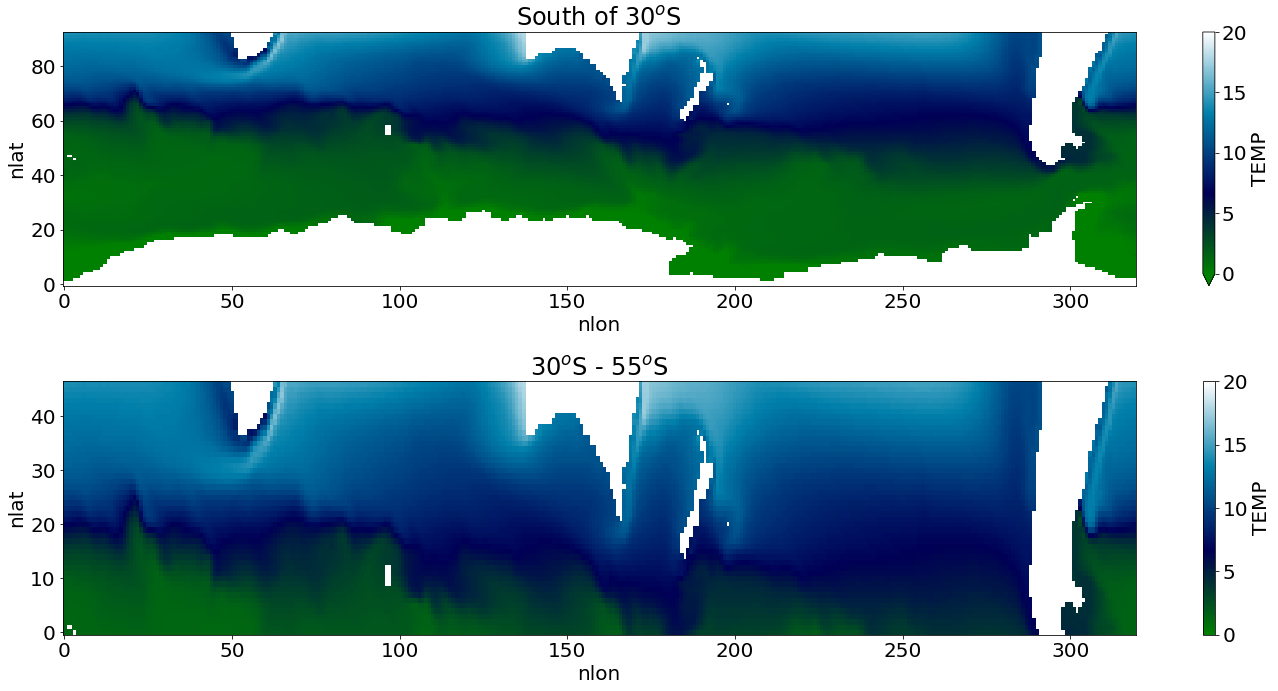

In [42]:
### Sample regional 
plt.rcParams['font.size'] = 20
plt.figure(figsize=[20,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(2,1,1)
temp_30S_ds = cesm_temp_200m_ds.where(cesm_temp_200m_ds['TLAT'] <= -30, drop=True)
temp_30S_ds.TEMP[:,:,:].median('year').plot(vmin = 0,vmax = 20,cmap = 'ocean')
plt.title('South of 30$^o$S')
plt.subplot(2,1,2)
temp_30S_ds = cesm_temp_200m_ds.where(cesm_temp_200m_ds['TLAT'] <= -30, drop=True)
temp_55S_30S_ds = temp_30S_ds.where(temp_30S_ds['TLAT'] >= -55, drop=True)
temp_55S_30S_ds.TEMP[:,:,:].median('year').plot(vmin = 0,vmax = 20,cmap = 'ocean')
plt.title('30$^o$S - 55$^o$S')

plt.tight_layout()

In [44]:
%%time
### Define regional boundaries 
def F_30S(var):
    """sample south of 3OS"""
    var_30S_ds = var.where(var['TLAT'] <= -30, drop=True)
    
    return var_30S_ds

def F_55_30S(var):
    """sample 55S - 3OS"""
    var_30S_ds = var.where(var['TLAT'] <= -30, drop=True)
    var_55_30S_ds = var_30S_ds.where(var_30S_ds['TLAT'] > -55, drop=True)
    
    return var_55_30S_ds
### computes regional anomalies time series 
temp_30S_200m_amom_ds = F_time_series_anomalies(F_30S(cesm_temp_200m_ds.TEMP),F_30S(area_ds))
temp_30S_50m_amom_ds = F_time_series_anomalies(F_30S(cesm_temp_50m_ds.TEMP),F_30S(area_ds))
temp_55_30S_200m_amom_ds = F_time_series_anomalies(F_55_30S(cesm_temp_50m_ds.TEMP),F_55_30S(area_ds))
temp_55_30S_50m_amom_ds = F_time_series_anomalies(F_55_30S(cesm_temp_50m_ds.TEMP),F_55_30S(area_ds))

o2_30S_200m_amom_ds = F_time_series_anomalies(F_30S(cesm_o2_200m_ds.O2),F_30S(area_ds))
o2_30S_50m_amom_ds = F_time_series_anomalies(F_30S(cesm_o2_50m_ds.O2),F_30S(area_ds))
o2_55_30S_200m_amom_ds = F_time_series_anomalies(F_55_30S(cesm_o2_200m_ds.O2),F_55_30S(area_ds))
o2_55_30S_50m_amom_ds = F_time_series_anomalies(F_55_30S(cesm_o2_50m_ds.O2),F_55_30S(area_ds))

CPU times: user 483 ms, sys: 67.4 ms, total: 550 ms
Wall time: 551 ms


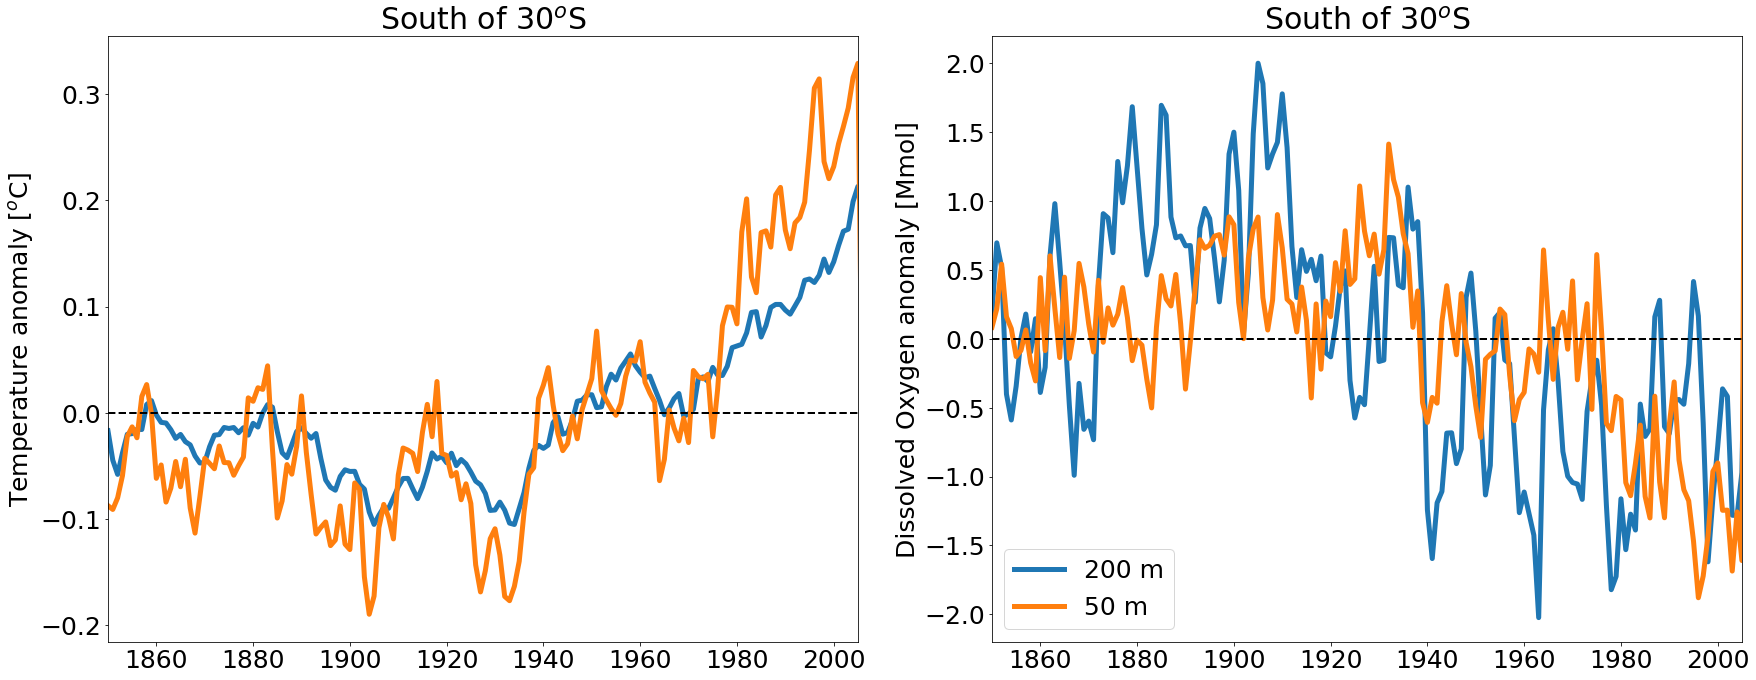

In [45]:
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(121)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_30S_200m_amom_ds)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_30S_50m_amom_ds)
plt.plot(cesm_temp_200m_ds.TEMP.year,np.zeros(len(cesm_temp_200m_ds.TEMP.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.title('South of 30$^o$S')
plt.ylabel('Temperature anomaly [$^o$C]')

plt.subplot(122)
plt.plot(cesm_o2_200m_ds.O2.year,o2_30S_200m_amom_ds,label = '200 m')
plt.plot(cesm_o2_50m_ds.O2.year,o2_30S_50m_amom_ds,label = '50 m')
plt.plot(cesm_o2_200m_ds.O2.year,np.zeros(len(cesm_o2_200m_ds.O2.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.legend(loc = 3)
plt.title('South of 30$^o$S')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.ylim(-2.2,2.2)

plt.tight_layout()

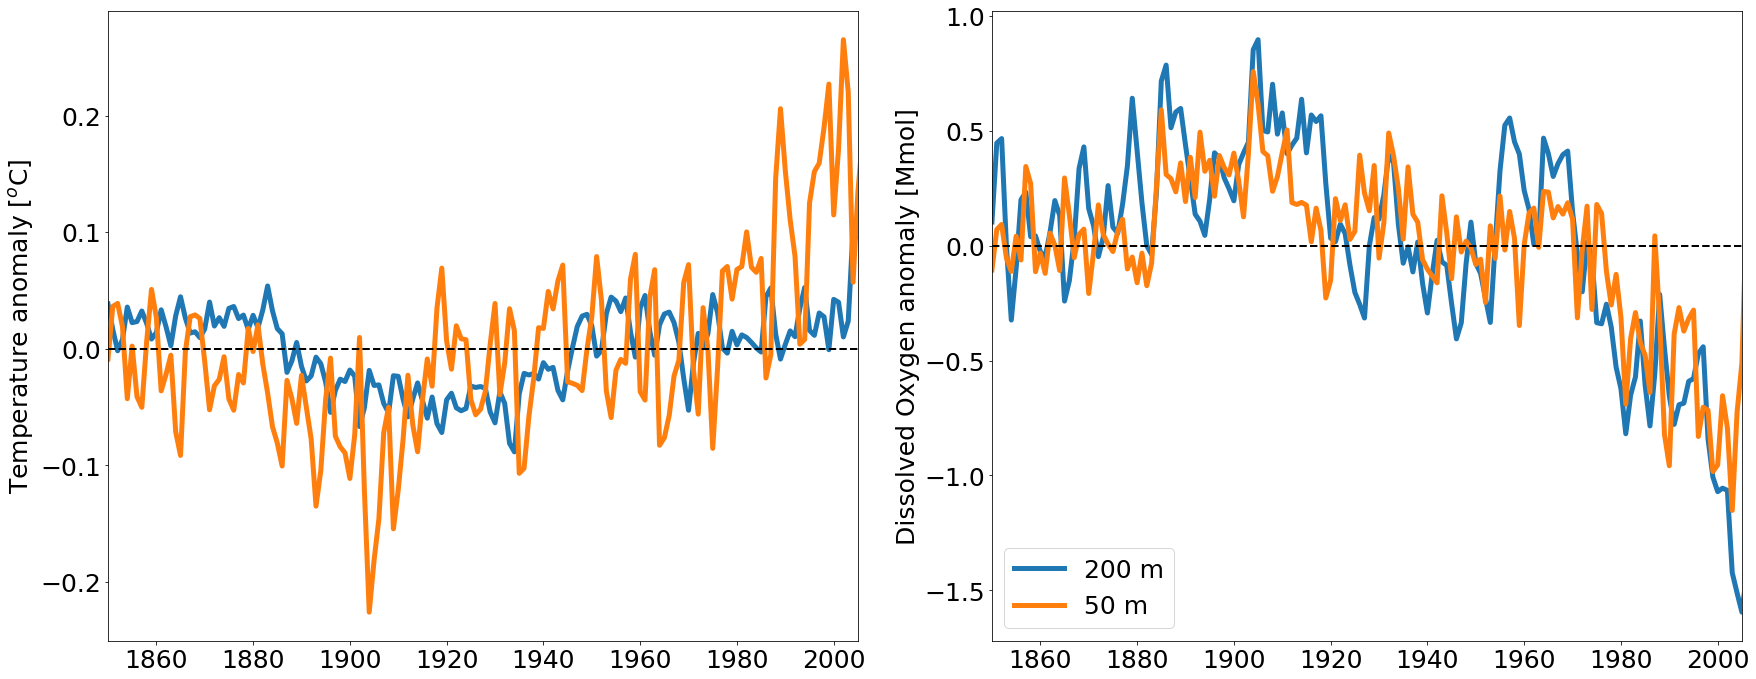

In [47]:
## plot time series
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(121)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_200m_amom_ds)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_50m_amom_ds)
plt.plot(cesm_temp_200m_ds.TEMP.year,np.zeros(len(cesm_temp_200m_ds.TEMP.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.ylabel('Temperature anomaly [$^o$C]')

plt.subplot(122)
plt.plot(cesm_o2_200m_ds.O2.year,o2_200m_amom_ds,label = '200 m')
plt.plot(cesm_o2_50m_ds.O2.year,o2_50m_amom_ds,label = '50 m')
plt.plot(cesm_o2_200m_ds.O2.year,np.zeros(len(cesm_o2_200m_ds.O2.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.legend(loc = 3)
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')

plt.tight_layout()

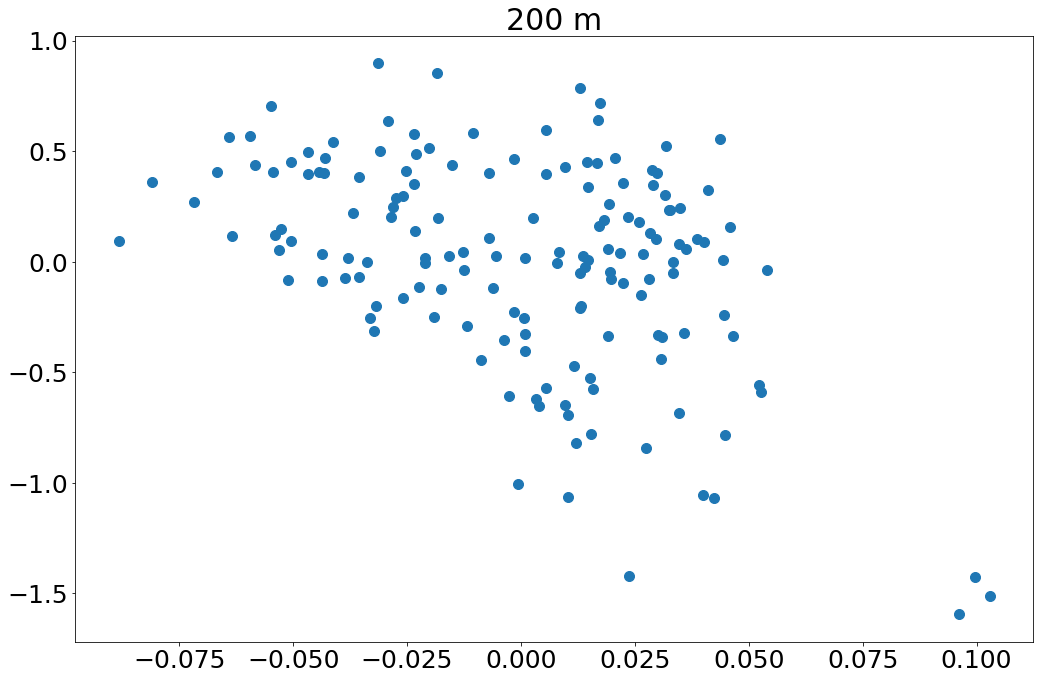

In [48]:
### Making a scatter plot
plt.rcParams['font.size'] = 25
plt.figure(figsize=[15,10])
plt.rcParams['lines.linewidth'] = 5

plt.scatter(temp_200m_amom_ds,o2_200m_amom_ds,s = 100)
plt.title('200 m')
plt.tight_layout()

[]

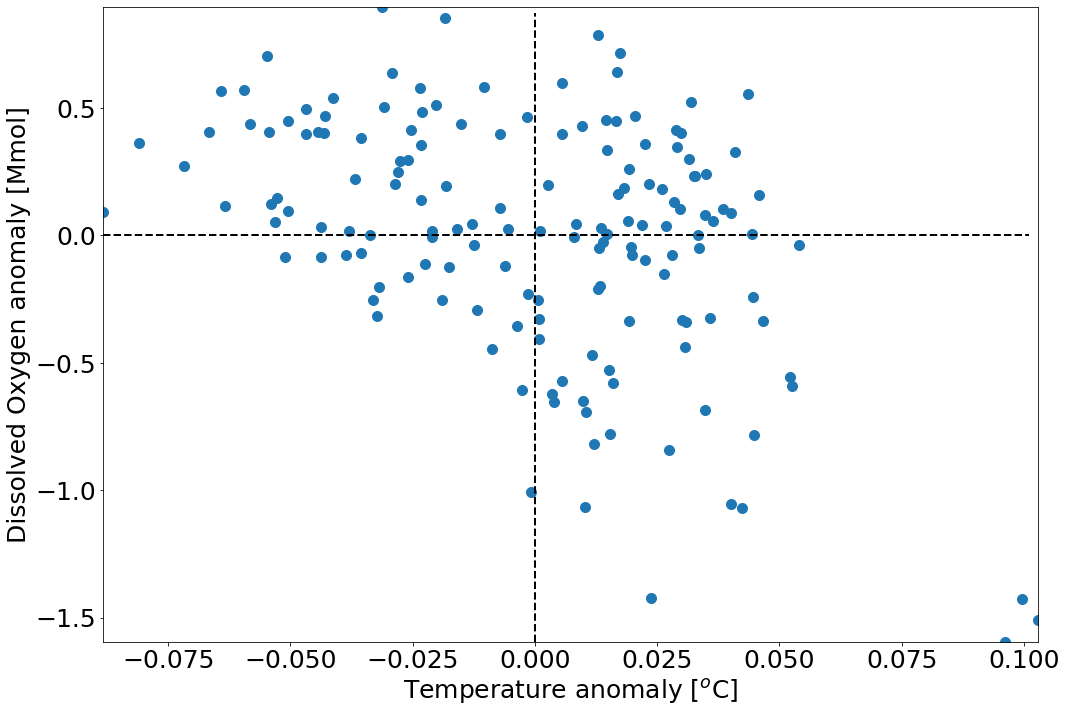

In [49]:
### Making a scatter plot 2
plt.rcParams['font.size'] = 25
plt.figure(figsize=[15,10])
plt.rcParams['lines.linewidth'] = 5

plt.scatter(temp_200m_amom_ds,o2_200m_amom_ds,s = 100)

plt.xlim(temp_200m_amom_ds.min(),temp_200m_amom_ds.max())
plt.ylim(o2_200m_amom_ds.min(),o2_200m_amom_ds.max())
plt.tight_layout()

plt.plot(np.arange(temp_200m_amom_ds.min(),temp_200m_amom_ds.max(),abs(temp_200m_amom_ds.min()-temp_200m_amom_ds.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(o2_200m_amom_ds.min(),o2_200m_amom_ds.max(),abs(o2_200m_amom_ds.min()-o2_200m_amom_ds.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('Temperature anomaly [$^o$C]')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.plot()

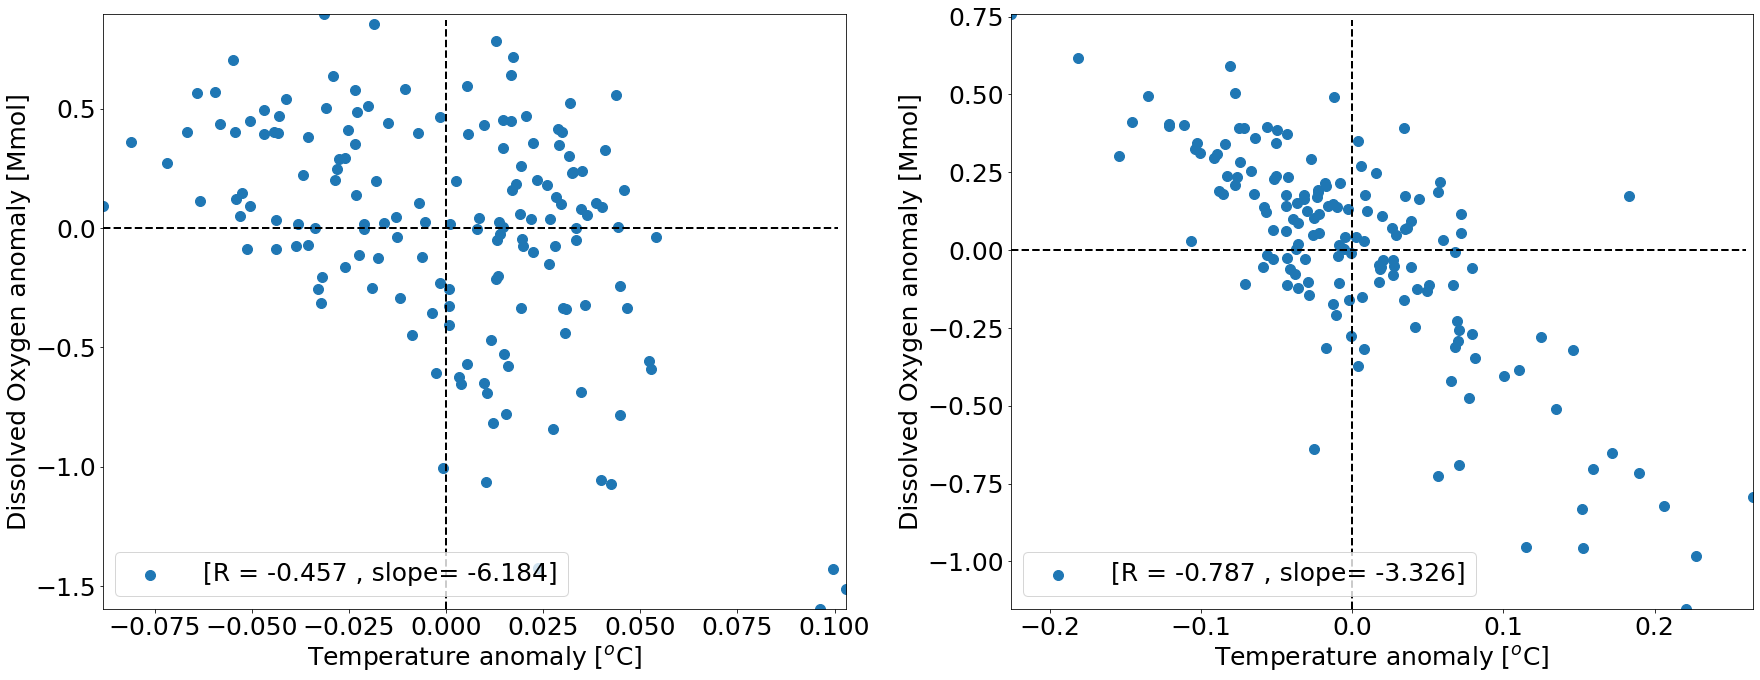

In [50]:
### Making a scatter using and adding the correlation coefficient and slope
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(121)
X = temp_200m_amom_ds
Y = o2_200m_amom_ds
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 100,label = f' [R = {r:0.3f} , slope= {slope:0.3f}]')
# sns.regplot(X, Y)
plt.xlim(temp_200m_amom_ds.min(),temp_200m_amom_ds.max())
plt.ylim(o2_200m_amom_ds.min(),o2_200m_amom_ds.max())

plt.plot(np.arange(temp_200m_amom_ds.min(),temp_200m_amom_ds.max(),abs(temp_200m_amom_ds.min()-temp_200m_amom_ds.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(o2_200m_amom_ds.min(),o2_200m_amom_ds.max(),abs(o2_200m_amom_ds.min()-o2_200m_amom_ds.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('Temperature anomaly [$^o$C]')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.legend(loc= 3)

plt.subplot(122)
X = temp_50m_amom_ds
Y = o2_50m_amom_ds
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 100,label = f' [R = {r:0.3f} , slope= {slope:0.3f}]')
# sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())

plt.plot(np.arange(X.min(),X.max(),abs(X.min()-X.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(Y.min(),Y.max(),abs(Y.min()-Y.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('Temperature anomaly [$^o$C]')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.legend(loc= 3)

plt.tight_layout()

/Users/preciousmongwe/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/preciousmongwe/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


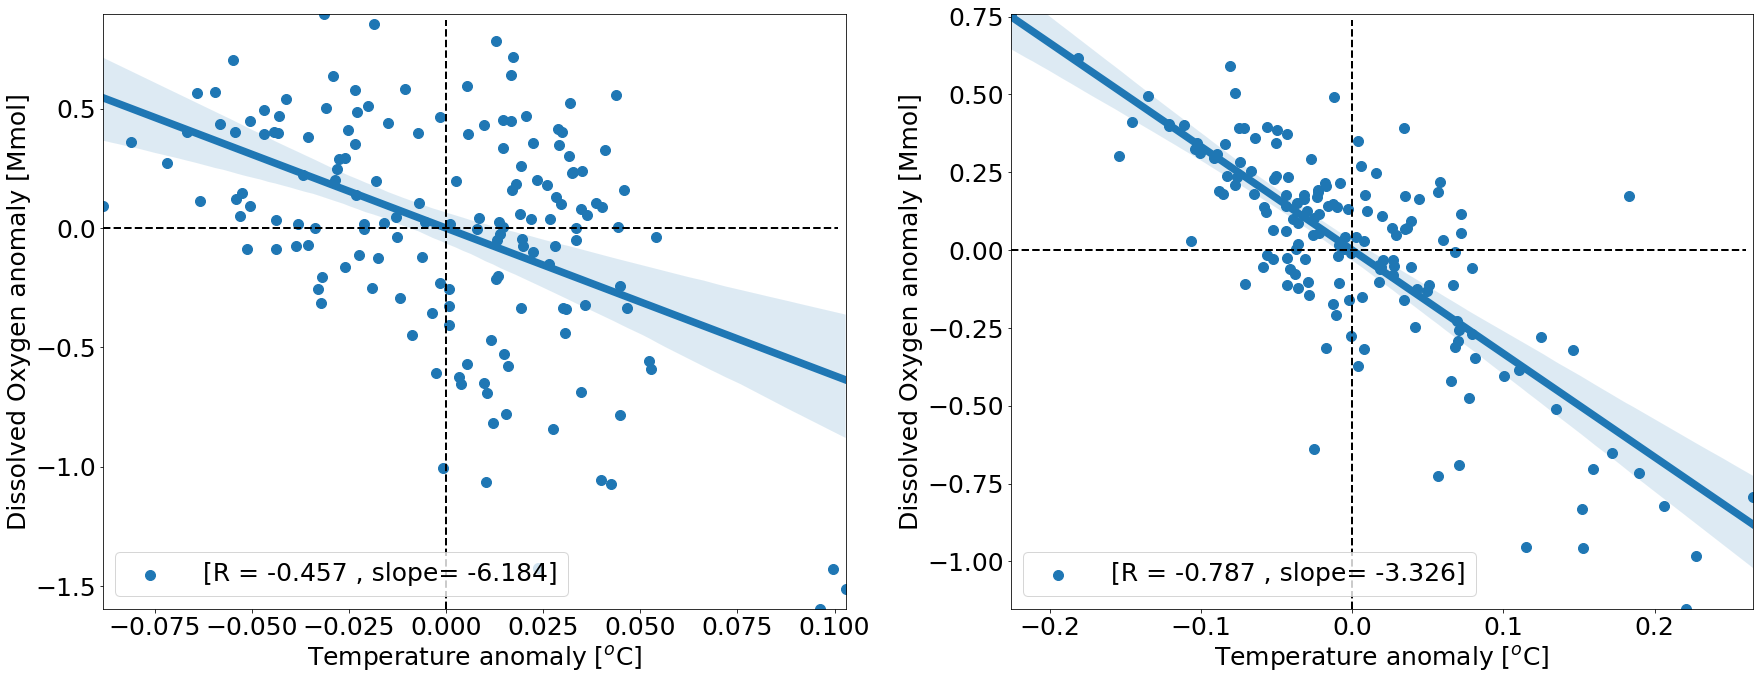

In [51]:
### Making a scatter using, adding a regressiong line, using seaborn (to install; pip install seaborn or conda install seaborn)
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(121)
X = temp_200m_amom_ds
Y = o2_200m_amom_ds
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 100,label = f' [R = {r:0.3f} , slope= {slope:0.3f}]')
sns.regplot(X, Y)
plt.xlim(temp_200m_amom_ds.min(),temp_200m_amom_ds.max())
plt.ylim(o2_200m_amom_ds.min(),o2_200m_amom_ds.max())

plt.plot(np.arange(temp_200m_amom_ds.min(),temp_200m_amom_ds.max(),abs(temp_200m_amom_ds.min()-temp_200m_amom_ds.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(o2_200m_amom_ds.min(),o2_200m_amom_ds.max(),abs(o2_200m_amom_ds.min()-o2_200m_amom_ds.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('Temperature anomaly [$^o$C]')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.legend(loc= 3)

plt.subplot(122)
X = temp_50m_amom_ds
Y = o2_50m_amom_ds
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 100,label = f' [R = {r:0.3f} , slope= {slope:0.3f}]')
sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())

plt.plot(np.arange(X.min(),X.max(),abs(X.min()-X.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(Y.min(),Y.max(),abs(Y.min()-Y.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('Temperature anomaly [$^o$C]')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.legend(loc= 3)

plt.tight_layout()

Exercises

In [ ]:
## 1) Calculate and plot the time series anomaly of temperature and dissolved oxygen in the tropical regions (15N - 15N) for the period 1850 - 2005 at 200 m and 50m
## 2) Perform the same calculation and plot for the region between 15N - 60N and North of 60N

In [280]:
## 1) Calculate the regression and slope (m, {y = mx + c}) of temperature at 50m with respect to temperature at 200 m.
## 2) Perform the same calculation for dissolved oxygen.
## 3) Display these in a scatter plot, showing the regression and slope in the legend

In [286]:
## 1) Plot a probability density function(pdf) of temperature and dissolved oxygen (50m and 500m) using two different methods 
## hint; searbon provide one method to do this

In [ ]:
##### Optional; Advanced excise 
##) If the period 1850 - 1960 is considered the natural climate, when does the climate forcing emerge from natural variability for temperature and dissolved oxygen at 50 m and 200m?
##) The time of emergence of the forced trend here is defined as 1.5 standard deviation of the natural climate.


In [52]:
%%time
def F_vars_corr_coef_int_ftrend(var_y,var_x,p_crf,p_rgr):
    """ computes the correlations coefficient(p_crf=1 & p_rgr=0) and 
    regression slope (p_crf=0 & p_rgr=1) in 3d fields"""
    
    ## create a empty numpy matrice with NaNs 
    var_cr = np.full(shape =(len(var_y.nlat),len(var_y.nlat)),fill_value=np.nan)
    
    cr_p = len(var_y.year)
    
    ### loop through the every latitude (i) and longitude (j) of the import data
    for i in range(len(var_y.nlat)):
        for j in range(len(var_y.nlon)):
            
            X = var_x[:,i,j].fillna(0)
            Y = var_y[:,i,j].fillna(0)

            ### computes corelation and regression slop
            (r, p) = stats.pearsonr(X, Y)
            slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)
                                                                
            var_cr[i,j] = slope*p_rgr + r_value*p_crf
            
    ## convert output file into a xarray format
    var_cr_gfxr = xr.DataArray(var_cr,dims=('nlat','nlon'))
            
    return var_cr_gfxr

temp_O2_regression_1850_2005_50m_ds = F_vars_corr_coef_int_ftrend(cesm_o2_50m_ds.O2,cesm_temp_50m_ds.TEMP,0,1)

/Users/preciousmongwe/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/preciousmongwe/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/preciousmongwe/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


CPU times: user 2min 52s, sys: 885 ms, total: 2min 53s
Wall time: 2min 54s
